# Project

In this project, my aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>CHIBUEZE C. IGWE</h2>

### Outline:
- A. Basic library and dataset importation
        1. dataset detailed information and Summary statistics
- B. Exploratory Data Analysis 
        1. data distribution
        2. Handling outliers
        3. Relationships between features
- C. Data Preprocessing
        1. Checking for null/missing values
        2. Checking for duplicate values
        3. data split into train and test data
- D. Machine Learning Application
        1. Model 1 - Support Vector Machine
        2. Model 2 - Decision tree
        3. Model 3 - K Nearest Neighbors
- E. Model Evaluation and Recommendations

# A: Import basic libraries and dataset

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("winequality.csv")

data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

# 1. Detailed information about the given dataset 
<h7>i. Except the label which is an integer datatype, other features are floats.<h7>
<h7>ii. The dataset has 1599 observations and 12 features or attributes</h7>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Summary statistics
<h7>Summary statistics showed that the standard deviation of chloride and density showed a near zero variation between values. Features with such values are usually poor predictors and thus will be dropped during data preprocessing.</h7>

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# B. Exploratory Data Analysis 
<h6>1. Distribution of the data</h6>

In [5]:
#display of the values of each category in "quality" attribute
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

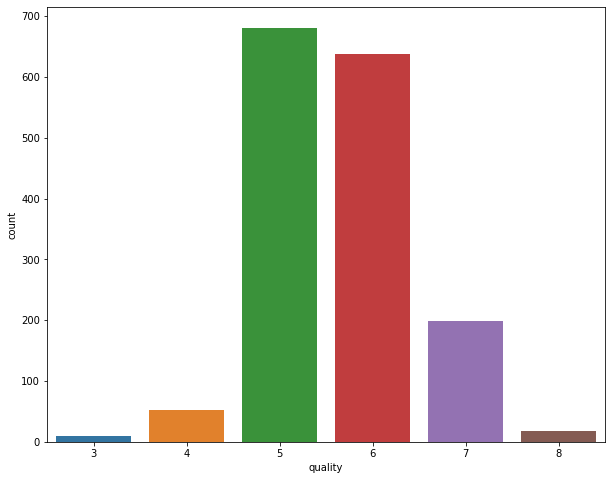

In [6]:
#Countplot to visualize label distribution
plt.figure(figsize=(10,8))
sns.countplot(data["quality"])

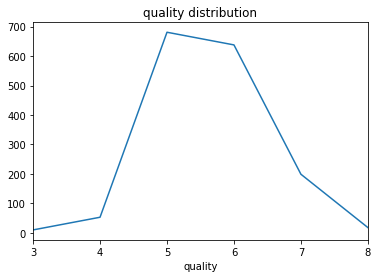

In [7]:
#c: visualization of the normalcy of the distribution of the target data
grouped_quality = data.groupby("quality").size()
grouped_quality.plot(title="quality distribution")

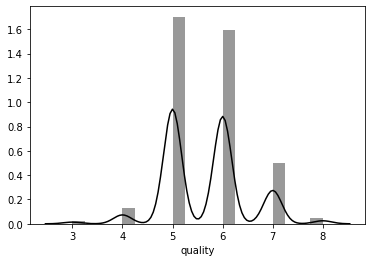

In [8]:
#Distplot showing the multiple distributions of the target data
sns.distplot(data["quality"], bins=20, color="k")

<h4>Note: The distribution plot showed that the target data has a normal distribution with multiple mean and variance</h4>

###### 2. Checking data distribution and outliers

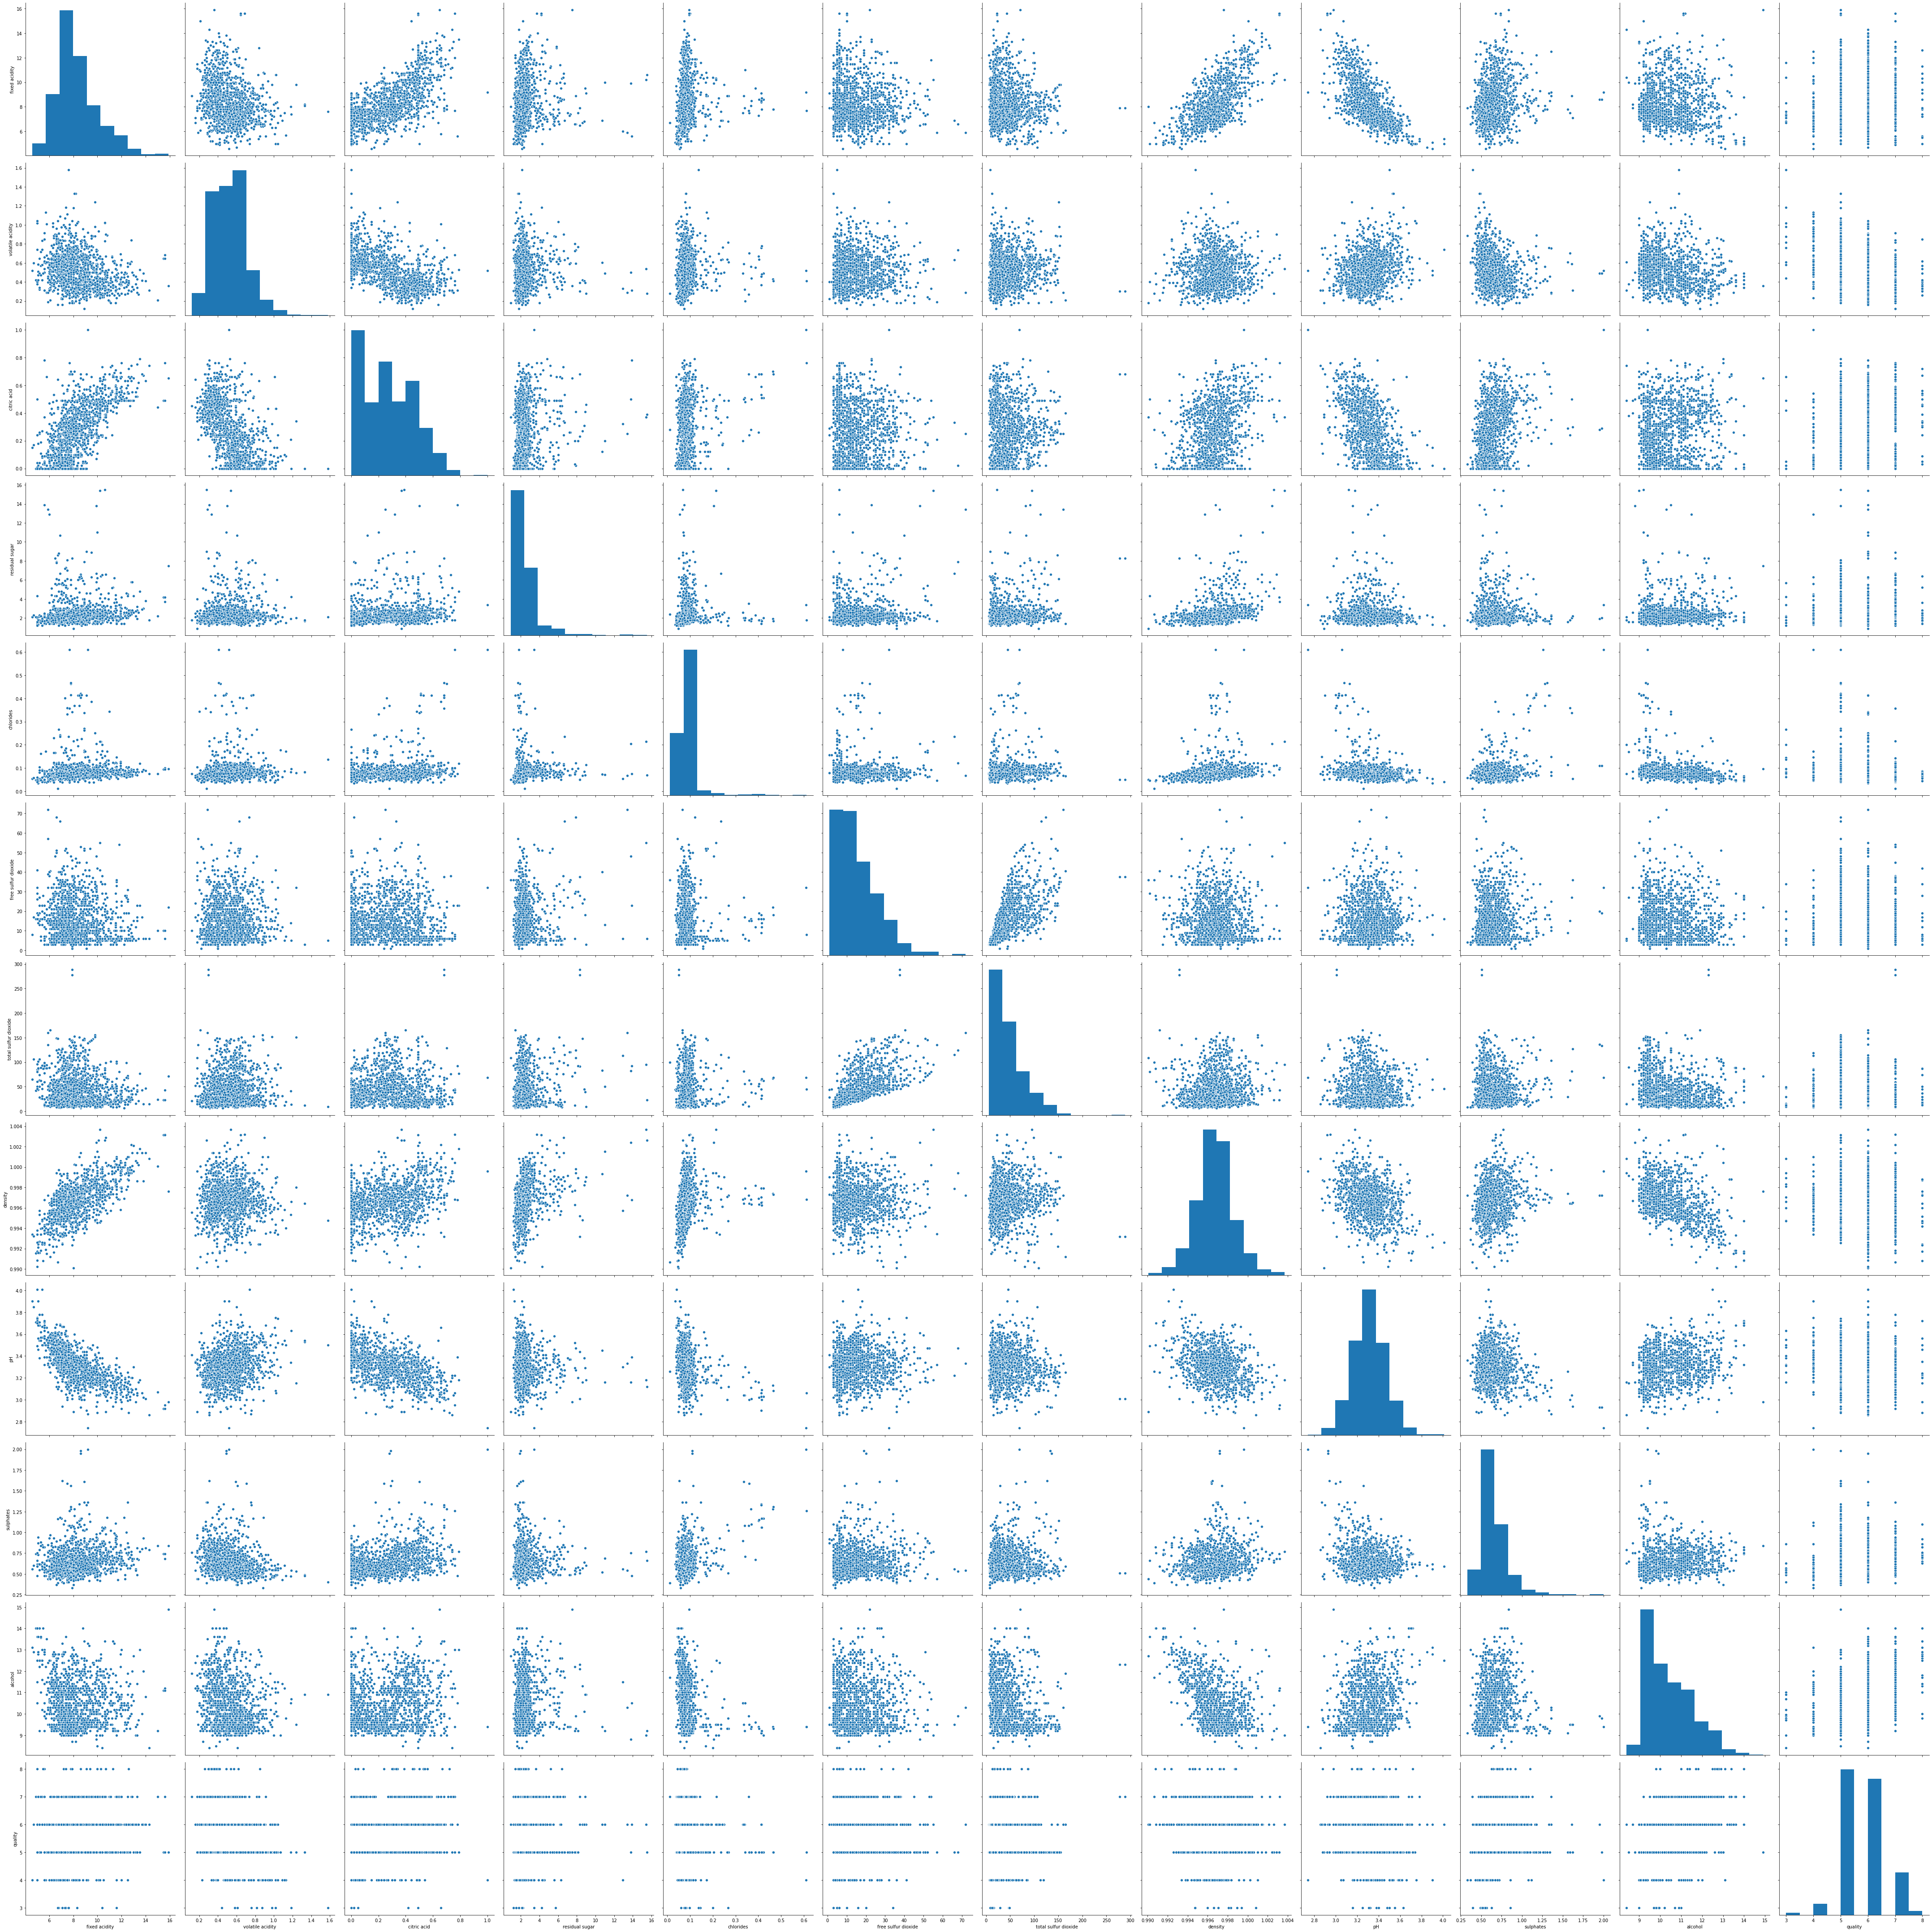

In [9]:
#Scatterplot matrix
sns.pairplot(data, height=5)
plt.tight_layout()


**Note**: i. Positive linear relationship exist between fixed acid and density. ii. Density and pH seems to have normal distribution. iii. residual sugar and chlorides contain several outliers

Defining a function used in handling **outliers**

In [10]:
def Outlier(data, col):
#Calculating the Inter Quantile Range    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Inter Quantile Range: ", IQR)
    
#Output of the feature values boolean form with true representing an outlier
#and false representing no outlier
    outliers =  data[col] < (Q1 - (1.5*IQR)) 
    outliers_ = data[col] > (Q3 + (1.5*IQR))
    print (outliers|outliers_, "\nN/B: False=Absence of outlier, True=presence of outlier")
    
#Graphical presentation of the feature before treatment to remove outliers
    plt.boxplot(data[col])
    plt.show()
    print("The boxplot above shows the untreated feature with outliers")
    
#Skew value of the feature 
    skewed_features = data[col].skew()
    print("Skew value before treatment: {}".format(skewed_features))
    
#Flooring and capping method of removing outliers
    f = data[col].quantile(0.10)
    print("Flooring value: ", f)
          
    c = data[col].quantile(0.90)
    print("Capping value: ", c)
    
#Treating the given feature using flooring and capping values above
    data[col] = np.where(data[col]<f, f, data[col])
    data[col] = np.where(data[col]>c, c, data[col])
    print("Current skew value: ", data[col].skew())
   
    return plt.boxplot(data[col])

Inter Quantile Range:  2.0999999999999996
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: fixed acidity, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


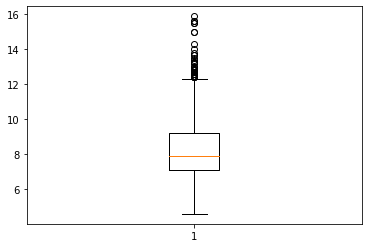

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.9827514413284587
Flooring value:  6.5
Capping value:  10.7
Current skew value:  0.515300890408548


{'whiskers': [<matplotlib.lines.Line2D at 0x265930c09c8>,
 'caps': [<matplotlib.lines.Line2D at 0x265930c7e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x265930c7688>],
 'medians': [<matplotlib.lines.Line2D at 0x265930c8c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x265930ca948>],
 'means': []}

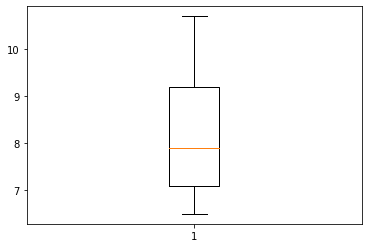

In [11]:
Outlier(data, "fixed acidity")

Inter Quantile Range:  0.25
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: volatile acidity, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


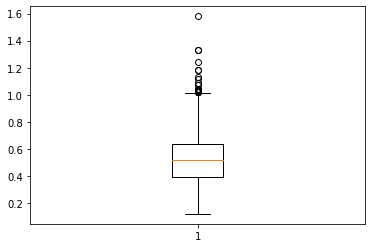

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.6715925723840199
Flooring value:  0.31
Capping value:  0.745
Current skew value:  0.05812605503265692


{'whiskers': [<matplotlib.lines.Line2D at 0x2659410d988>,
 'caps': [<matplotlib.lines.Line2D at 0x26594111788>,
 'boxes': [<matplotlib.lines.Line2D at 0x2659410d188>],
 'medians': [<matplotlib.lines.Line2D at 0x26594117608>],
 'fliers': [<matplotlib.lines.Line2D at 0x26594117d08>],
 'means': []}

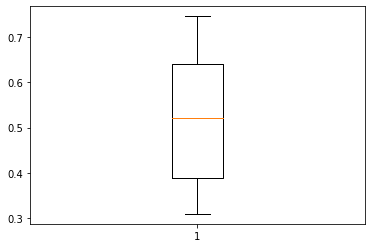

In [12]:
Outlier(data, "volatile acidity")

Inter Quantile Range:  0.32999999999999996
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: citric acid, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


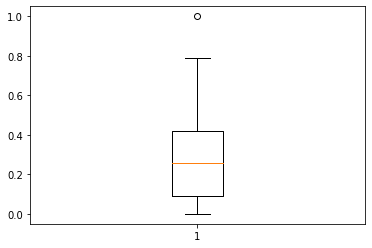

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.3183372952546368
Flooring value:  0.010000000000000002
Capping value:  0.5220000000000005
Current skew value:  0.030607598277460322


{'whiskers': [<matplotlib.lines.Line2D at 0x265941d6a88>,
 'caps': [<matplotlib.lines.Line2D at 0x265941dce88>,
 'boxes': [<matplotlib.lines.Line2D at 0x265941d6888>],
 'medians': [<matplotlib.lines.Line2D at 0x265941dfd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x265941dfe88>],
 'means': []}

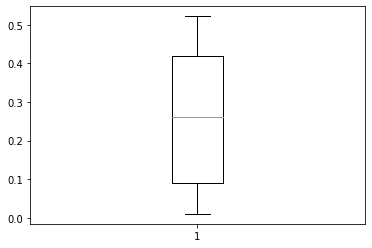

In [13]:
Outlier(data, "citric acid")

Inter Quantile Range:  0.7000000000000002
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: residual sugar, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


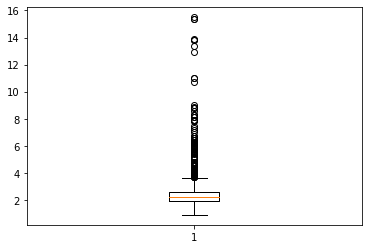

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 4.54065542590319
Flooring value:  1.6999999999999997
Capping value:  3.6
Current skew value:  1.0041169119074087


{'whiskers': [<matplotlib.lines.Line2D at 0x265942aaf08>,
 'caps': [<matplotlib.lines.Line2D at 0x265942afd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x265942aa708>],
 'medians': [<matplotlib.lines.Line2D at 0x265942b2b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x265942b2d08>],
 'means': []}

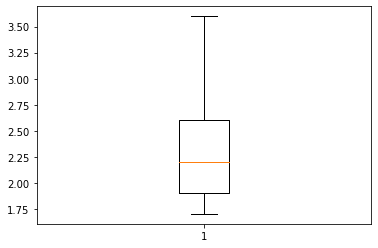

In [14]:
Outlier(data, "residual sugar")

Inter Quantile Range:  0.01999999999999999
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: chlorides, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


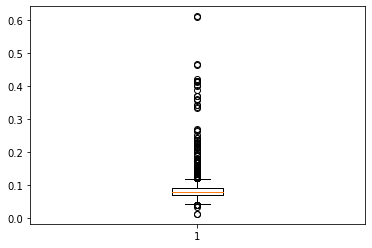

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 5.680346571971722
Flooring value:  0.06
Capping value:  0.109
Current skew value:  0.4400120504617181


{'whiskers': [<matplotlib.lines.Line2D at 0x26594381e08>,
 'caps': [<matplotlib.lines.Line2D at 0x26594385c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x26594381608>],
 'medians': [<matplotlib.lines.Line2D at 0x26594387a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x26594387c08>],
 'means': []}

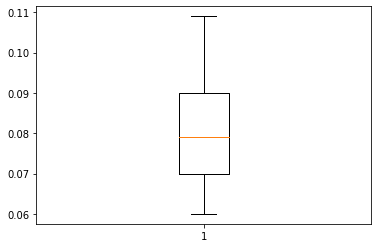

In [15]:
Outlier(data, "chlorides")

Inter Quantile Range:  14.0
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: free sulfur dioxide, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


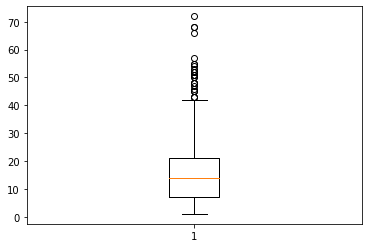

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 1.250567293314441
Flooring value:  5.0
Capping value:  31.0
Current skew value:  0.5350753185300476


{'whiskers': [<matplotlib.lines.Line2D at 0x26594450d88>,
 'caps': [<matplotlib.lines.Line2D at 0x26594454b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x26594450588>],
 'medians': [<matplotlib.lines.Line2D at 0x26594457a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26594457b88>],
 'means': []}

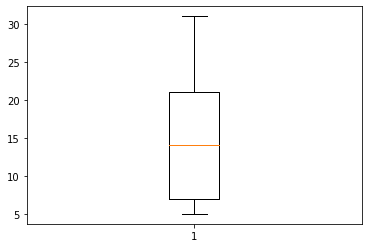

In [16]:
Outlier(data, "free sulfur dioxide")

Inter Quantile Range:  40.0
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: total sulfur dioxide, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


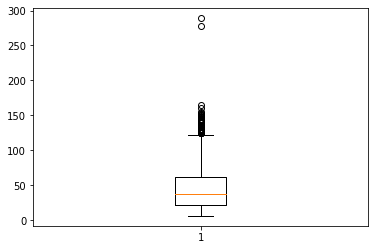

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 1.515531257594554
Flooring value:  14.0
Capping value:  93.20000000000005
Current skew value:  0.6507310763970949


{'whiskers': [<matplotlib.lines.Line2D at 0x2659451e688>,
 'caps': [<matplotlib.lines.Line2D at 0x2659451eec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2659451ae48>],
 'medians': [<matplotlib.lines.Line2D at 0x26594523d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26594529a08>],
 'means': []}

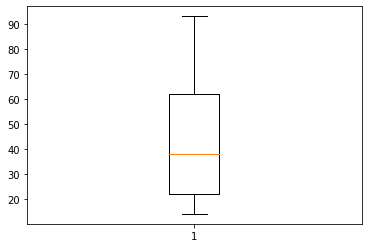

In [17]:
Outlier(data, "total sulfur dioxide")

Inter Quantile Range:  0.002234999999999876
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: density, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


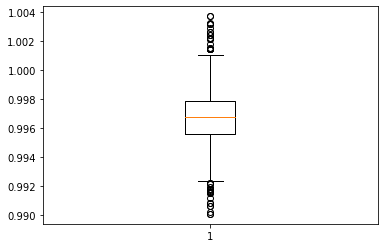

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.07128766294945525
Flooring value:  0.994556
Capping value:  0.9991399999999999
Current skew value:  0.10206810540243107


{'whiskers': [<matplotlib.lines.Line2D at 0x265945f3a48>,
 'caps': [<matplotlib.lines.Line2D at 0x265945f7848>,
 'boxes': [<matplotlib.lines.Line2D at 0x265945f3248>],
 'medians': [<matplotlib.lines.Line2D at 0x265945fe6c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x265945fedc8>],
 'means': []}

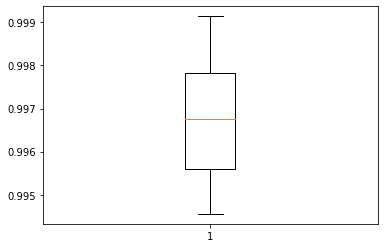

In [18]:
Outlier(data, "density")

Inter Quantile Range:  0.18999999999999995
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: pH, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


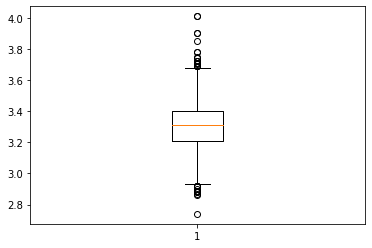

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.19368349811284427
Flooring value:  3.12
Capping value:  3.51
Current skew value:  0.04943367853959553


{'whiskers': [<matplotlib.lines.Line2D at 0x265946bfb48>,
 'caps': [<matplotlib.lines.Line2D at 0x265946c3948>,
 'boxes': [<matplotlib.lines.Line2D at 0x265946bf348>],
 'medians': [<matplotlib.lines.Line2D at 0x265946c97c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x265946c9ec8>],
 'means': []}

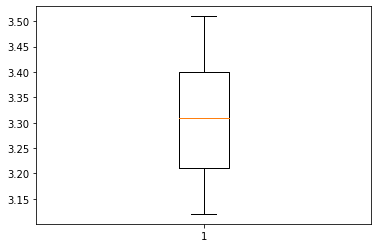

In [19]:
Outlier(data, "pH")

Inter Quantile Range:  0.17999999999999994
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: sulphates, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


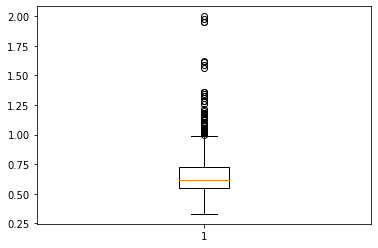

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 2.4286723536602945
Flooring value:  0.5
Capping value:  0.85
Current skew value:  0.5061137554768932


{'whiskers': [<matplotlib.lines.Line2D at 0x26594795fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x26594799dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x265947957c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2659479ec48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2659479edc8>],
 'means': []}

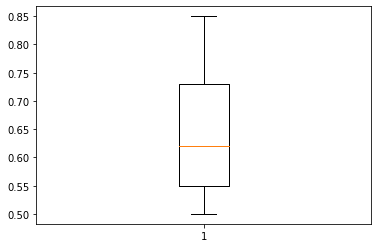

In [20]:
Outlier(data, "sulphates")

Inter Quantile Range:  1.5999999999999996
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: alcohol, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


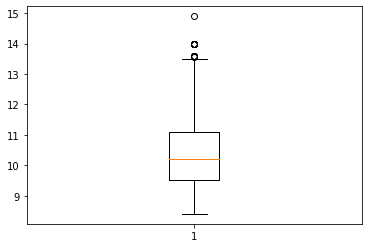

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.8608288068888538
Flooring value:  9.3
Capping value:  12.0
Current skew value:  0.4822612532757502


{'whiskers': [<matplotlib.lines.Line2D at 0x2659486aec8>,
 'caps': [<matplotlib.lines.Line2D at 0x2659486ecc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2659486a6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x26594872b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x26594872cc8>],
 'means': []}

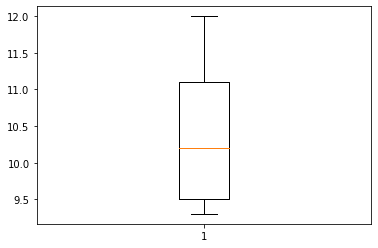

In [21]:
Outlier(data, "alcohol")

Inter Quantile Range:  1.0
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


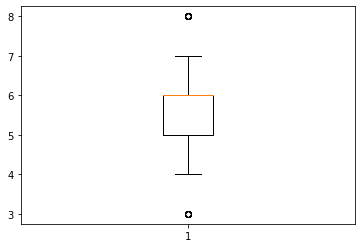

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 0.21780157547366327
Flooring value:  5.0
Capping value:  7.0
Current skew value:  0.5592924337852998


{'whiskers': [<matplotlib.lines.Line2D at 0x26594935bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2659493a9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x265949353c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2659493f848>],
 'fliers': [<matplotlib.lines.Line2D at 0x2659493ff48>],
 'means': []}

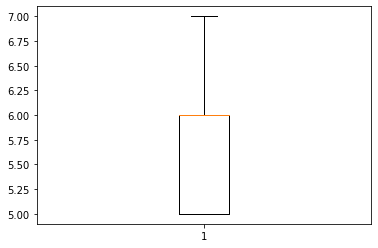

In [22]:
Outlier(data, "quality")

###### 3.Relationship between features

In [23]:
#Pearson product-moment coefficient correlation

data_corr = data.corr()["quality"][:-1]

data_corr

fixed acidity           0.140901
volatile acidity       -0.371639
citric acid             0.217098
residual sugar          0.032689
chlorides              -0.189511
free sulfur dioxide    -0.083638
total sulfur dioxide   -0.240951
density                -0.184137
pH                     -0.037696
sulphates               0.371456
alcohol                 0.522690
Name: quality, dtype: float64

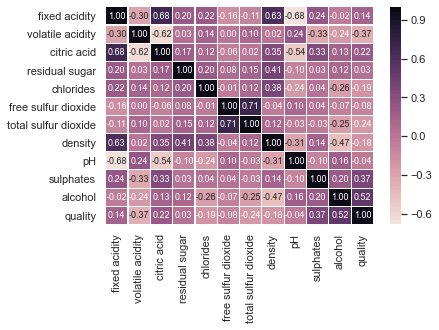

In [24]:
#Heatmap visualization of the correlation between features
sns.set(font_scale=1.0)
data_heatmap2= sns.heatmap(data.corr(),
                          cmap=sns.cubehelix_palette(50, light=0.90,
                                                     dark=0.05),
                           linewidth=0.05, annot=True, annot_kws={"size": 9},
                           fmt=".2f", square=False)

# C. Data Preprocessing

In [25]:
#1. checking for null values across features
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
#2. No duplicate values in the dataset
drop_dup = data.drop_duplicates(keep="first", inplace=True)
print(drop_dup)

None


##### Creating new feature named "quality_category"

In [27]:
#categorizing quantity 
def quality_categorized(x):
    if 3<=x<5:
        return "bad"
    elif 5<=x<7:
        return "medium"
    else:
        return "good"

In [28]:
data["quality_category"] = data.quality.apply(quality_categorized)

data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.700        0.010             1.9      0.076   
1            7.8             0.745        0.010             2.6      0.098   
2            7.8             0.745        0.040             2.3      0.092   
3           10.7             0.310        0.522             1.9      0.075   
5            7.4             0.660        0.010             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality quality_category  
0      9.4      5.0           medium  
1      9.8      5.0           medium  
2      9.8      5.0           medium  
3      9.8      6.0           medium  
5      9.4      5.0           medium

In [29]:
grouped_data = data["quality_category"].value_counts()

grouped_data

medium    1171
good       182
Name: quality_category, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()

data["label"] = label_encoder.fit_transform(data["quality_category"])

data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.700        0.010             1.9      0.076   
1            7.8             0.745        0.010             2.6      0.098   
2            7.8             0.745        0.040             2.3      0.092   
3           10.7             0.310        0.522             1.9      0.075   
5            7.4             0.660        0.010             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality quality_category  label  
0      9.4      5.0           medium      1  
1      9.8      5.0           medium      1  
2      9.8      5.0           medium      1  
3      9.8      6.0           medium      1  
5      9.4      5.0           medium      1

In [32]:
categories = list(label_encoder.inverse_transform([0, 1]))

categories

['good', 'medium']

In [33]:
data_copy = data.drop(axis=1, labels=["quality", "quality_category"])

data_copy

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700        0.010             1.9      0.076   
1               7.8             0.745        0.010             2.6      0.098   
2               7.8             0.745        0.040             2.3      0.092   
3              10.7             0.310        0.522             1.9      0.075   
5               7.4             0.660        0.010             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620        0.080             1.9      0.068   
1594            6.5             0.600        0.080             2.0      0.090   
1595            6.5             0.550        0.100             2.2      0.062   
1597            6.5             0.645        0.120             2.0      0.075   
1598            6.5             0.310        0.470             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 31.0                  44.0  0.99490  3.45       0.58   
1595                 31.0                  51.0  0.99512  3.51       0.76   
1597                 31.0                  44.0  0.99547  3.51       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  label  
0         9.4      1  
1         9.8      1  
2         9.8      1  
3         9.8      1  
5         9.4      1  
...       ...    ...  
1593      9.5      1  
1594     10.5      1  
1595     11.2      1  
1597     10.2      1  
1598     11.0      1  

[1353 rows x 12 columns]

In [34]:
#Normalizing features
scaler = StandardScaler()
scaler.fit(data_copy)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
#3. import train_test_split and Split Train and Test dataset by 70% to 30%
from sklearn.model_selection import train_test_split

X, y = data_copy.iloc[:, :-1], data_copy.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1265            7.2             0.570        0.050             2.3      0.081   
939             6.5             0.460        0.170             1.7      0.073   
737             8.2             0.590        0.010             2.5      0.093   
442            10.7             0.685        0.522             3.6      0.100   
224             8.4             0.635        0.360             2.0      0.089   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
1265                 16.0                  36.0  0.995640  3.38       0.60   
939                   7.0                  14.0  0.994556  3.51       0.54   
737                  19.0                  58.0  0.999140  3.50       0.65   
442                   6.0                  43.0  0.999140  3.12       0.68   
224                  15.0                  55.0  0.997450  3.31       0.57   

      alcohol  
1265     10.3  
939      11.4  
737       9.3  
442      11.2  
224      10.4

# D. ML Application

<h3>Model 1: Support Vector Machine</h3>

In [36]:
## 1.1: import model and other libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

#1.2: call up and fit model
svm = SVC(kernel="rbf", C=1, random_state=1, gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
#1.3: Model evaluation using accuracy, precision, recall and F1 scores
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("accuracy = {:.1f}%".format(acc*100))
print("Precision = {:.1f}%".format(prec*100))
print("Recall = {:.1f}%".format(recall*100))
print("F1_score = {:.1f}".format(f1*100))

accuracy = 87.2%
Precision = 85.3%
Recall = 54.3%
F1_score = 54.6


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.09      0.16        56
           1       0.87      1.00      0.93       350

    accuracy                           0.87       406
   macro avg       0.85      0.54      0.55       406
weighted avg       0.87      0.87      0.82       406



Text(185.30000000000013, 0.5, 'True Labels')

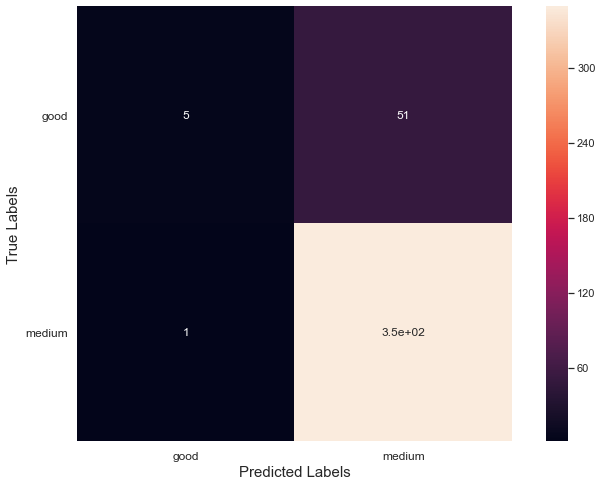

In [39]:
#1.4: Generating confusion matrix
cmat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax =sns.heatmap(cmat, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

## Model 2: Decision Tree

In [40]:
#2.1: import model

from sklearn.tree import DecisionTreeClassifier

In [41]:
#2.2: call up and fit model
clf = DecisionTreeClassifier(max_depth=9, max_features = 6,
                             min_samples_split=3, random_state=35)

clf.fit(X_train, y_train)

print("Accuracy of train = {:.1f}%".format(clf.score(X_train, y_train)*100))
print("Accuracy of test = {:.1f}%".format(clf.score(X_test, y_test)*100))

Accuracy of train = 98.1%
Accuracy of test = 85.0%


**Bias for training** = 100-98.1 = 1.9%  
**Bias for test** = 100-85.0 = 15.0%   

**Variance** = test bias - training bias = 13.1%  

In [42]:
#2.3: Model evaluation using accuracy, precision, recall and F1 scores

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy score = {:.1f}%".format(acc*100))
print("Precision score = {:.1f}%".format(prec*100))
print("Recall score = {:.1f}%".format(recall*100))
print("F1 score = {:.1f}%".format(f1*100))


Accuracy score = 85.0%
Precision score = 68.3%
Recall score = 68.0%
F1 score = 68.2%


Text(185.30000000000013, 0.5, 'Actual values')

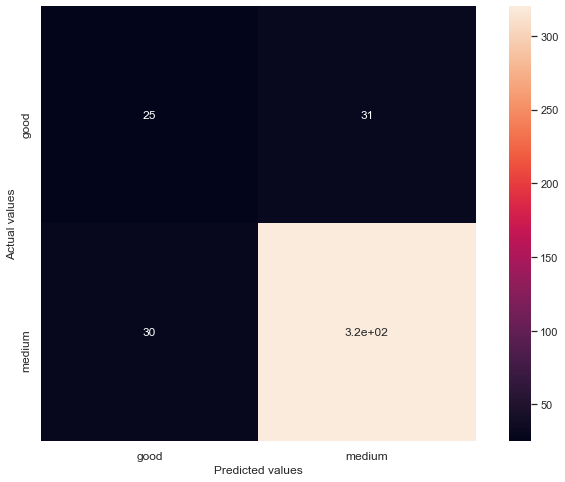

In [43]:
#2.4: Generating confusion matrix

cmat2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
ax = sns.heatmap(cmat2, annot=True, cbar=True, square=True)
ax.xaxis.set_ticklabels(categories, fontsize=12)
ax.yaxis.set_ticklabels(categories, fontsize=12)
ax.set_xlabel("Predicted values", fontsize=12)
ax.set_ylabel("Actual values", fontsize=12)

## Model 3: K Nearest Neighbors (KNN)

In [44]:
#3.1: import model

from sklearn.neighbors import KNeighborsClassifier

In [45]:
#3.2: Call up and fit model

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [46]:
#3.3: Model evaluation using accuracy, precision, recall and F1 scores

y_pred = knn.predict(X_test)

acc3 = accuracy_score(y_test, y_pred)
prec3 = precision_score(y_test, y_pred, average = "macro")
recall3 = recall_score(y_test, y_pred, average = "macro")
F1_3 = f1_score(y_test, y_pred, average = "macro")

print("Accuracy score = {:.1f}%".format(acc3*100))
print("Precision score = {:.1f}%".format(prec3*100))
print("Recall score = {:.1f}%".format(recall3*100))
print("F1 score = {:.1f}%".format(F1_3*100))

Accuracy score = 83.5%
Precision score = 60.6%
Recall score = 56.7%
F1 score = 57.7%


Text(79.46000000000004, 0.5, 'Actual value')

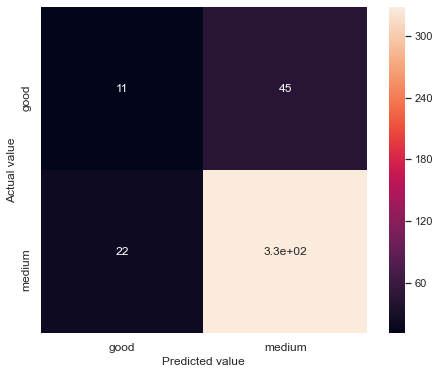

In [47]:
#3.4: Generating confusion matrix
cmat3 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
ax = sns.heatmap(cmat3, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(categories, fontsize=12)
ax.yaxis.set_ticklabels(categories, fontsize=12)
ax.set_xlabel("Predicted value", fontsize=12)
ax.set_ylabel("Actual value", fontsize=12)

# E. Model Evaluation

In [48]:
#Select the best performing model and write your comments about why choose this model.

row1 = [87.2, 85.0, 83.5]
row2 = [85.3, 68.3, 60.6]
row3 = [54.3, 68.0, 56.7]
row4 = [54.6, 68.2, 57.7]

data_ = [row1, row2, row3, row4]

model_score = pd.DataFrame(data_, index=["Accuracy score", "Precision score", "Recall score",
                                         "F1 score"], columns=["Support Vector Machine (%)",
                                                               "Decision Tree (%)", "KNN (%)"])

model_score

Support Vector Machine (%)  Decision Tree (%)  KNN (%)
Accuracy score                         87.2               85.0     83.5
Precision score                        85.3               68.3     60.6
Recall score                           54.3               68.0     56.7
F1 score                               54.6               68.2     57.7

**From the table above,** the SVM model performed best in predicting the quality of wine with comparable accuracy, good recall, precision and F1 score when compared to the other two models. Going forward, the model can be improved through dimentionality reduction.